<a href="https://colab.research.google.com/github/eko-andri-prasetyo/Machine_Learning_Terapan-Predictive_Analytics/blob/main/ekoandriprasetyo_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **California Housing Price Prediction Notebook**



# 1. Import Libraries

Pada tahap ini, kita mengimpor semua library yang diperlukan untuk analisis data, preprocessing, modeling, dan evaluasi. Library-library ini mencakup tools untuk manipulasi data, visualisasi, machine learning, dan utilitas lainnya

In [ ]:
# Install xgboost jika belum terinstall
!pip install xgboost

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

# Preprocessing and model selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# 2. Data Loading and Initial Exploration

Tahap ini bertujuan untuk memuat dataset dan melakukan eksplorasi awal untuk memahami struktur data, missing values, duplikat, dan statistik deskriptif. Ini adalah langkah penting untuk memahami kualitas data sebelum melakukan preprocessing

In [ ]:
# Download dataset
print("Mengunduh dataset California Housing...")
!wget -q https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv

# Load dataset
print("Memuat dataset California Housing...")
df = pd.read_csv('housing.csv')

# Display basic information
print("=" * 50)
print("OVERVIEW DATASET")
print("=" * 50)
print(f"Shape Dataset: {df.shape}")
print(f"Jumlah sampel: {df.shape[0]}")
print(f"Jumlah fitur: {df.shape[1]}")

# Display first few rows
print("\n5 baris pertama data:")
display(df.head())

# Dataset information
print("\nInformasi Dataset:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Check for duplicates
print(f"\nJumlah data duplikat: {df.duplicated().sum()}")

# Descriptive statistics
print("\nStatistik Deskriptif:")
display(df.describe())

Mengunduh dataset California Housing...
Memuat dataset California Housing...
OVERVIEW DATASET
Shape Dataset: (20640, 10)
Jumlah sampel: 20640
Jumlah fitur: 10

5 baris pertama data:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY



Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None

Missing Values:
total_bedrooms    207
dtype: int64

Jumlah data duplikat: 0

Statistik Deskriptif:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# 3. Exploratory Data Analysis

Pada tahap EDA, kita melakukan analisis mendalam terhadap data untuk memahami distribusi, korelasi, dan pola dalam dataset. Visualisasi membantu dalam memahami hubungan antara variabel dan mengidentifikasi insights penting

EXPLORATORY DATA ANALYSIS


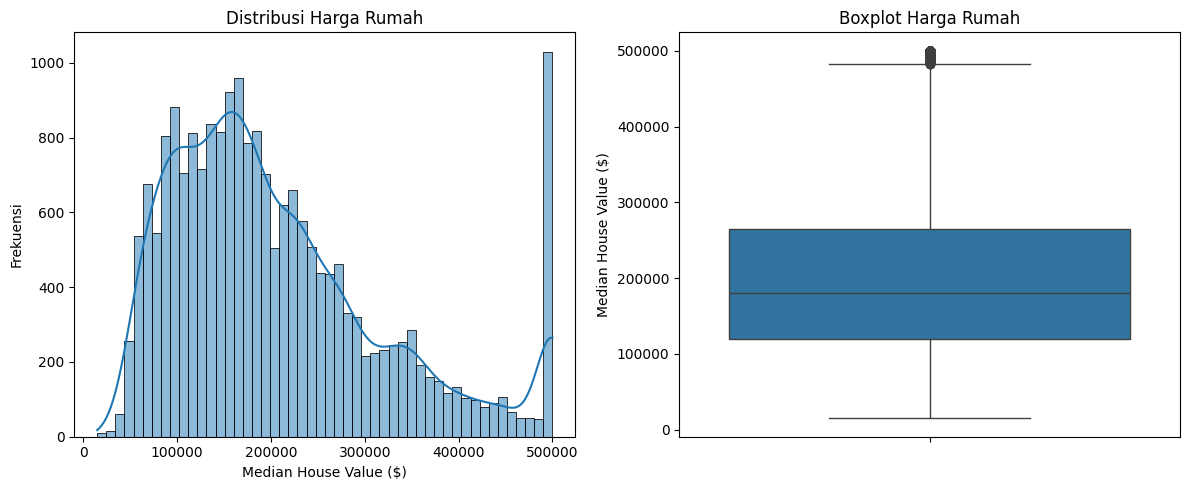

Korelasi dengan target variable:
median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


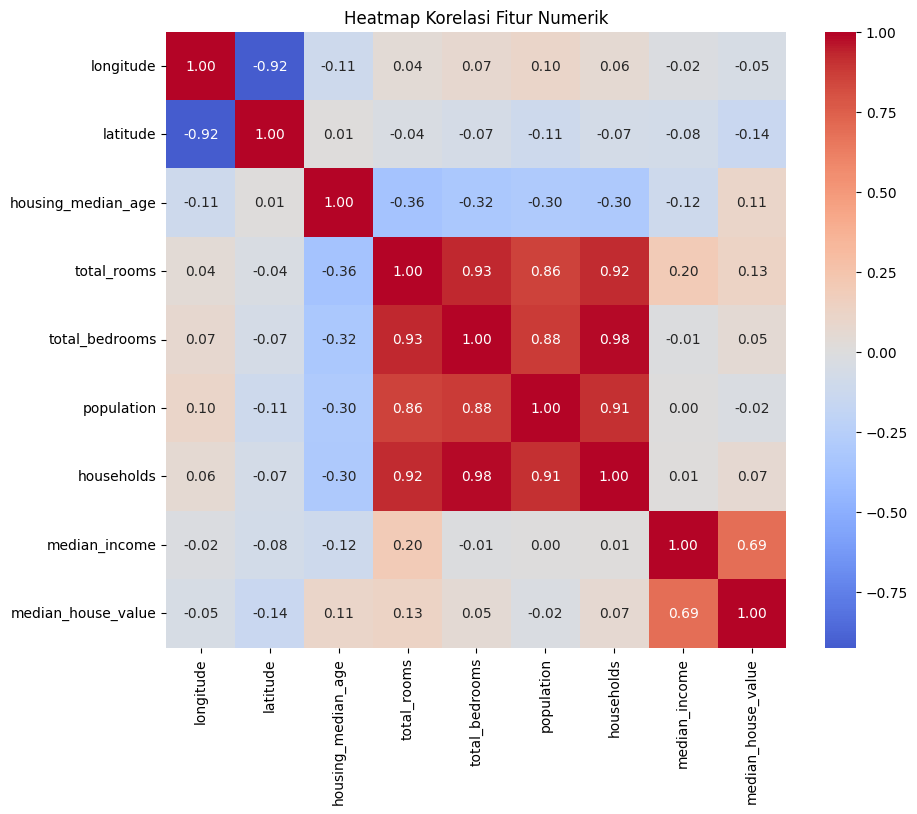


Distribusi Ocean Proximity:
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


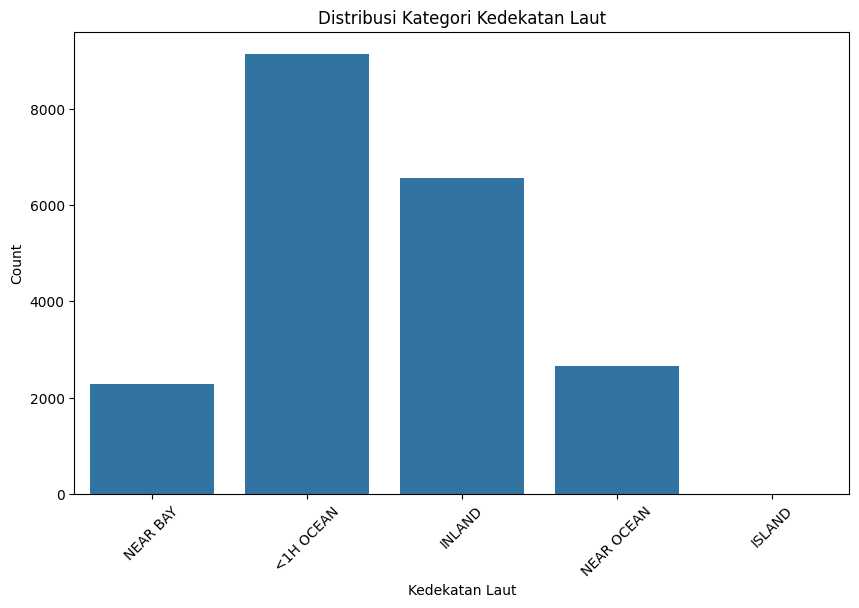

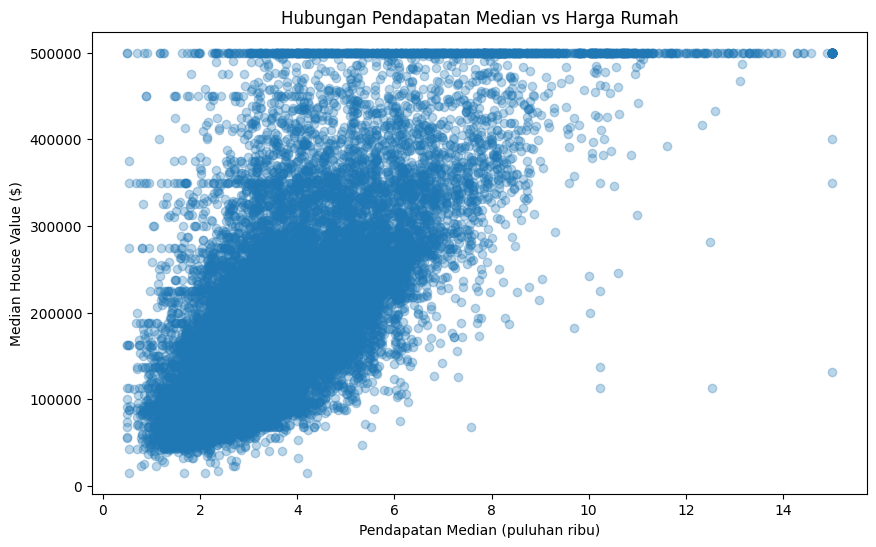

In [ ]:
print("=" * 50)
print("EXPLORATORY DATA ANALYSIS")
print("=" * 50)

# Distribution of target variable
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['median_house_value'], kde=True, bins=50)
plt.title('Distribusi Harga Rumah')
plt.xlabel('Median House Value ($)')
plt.ylabel('Frekuensi')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['median_house_value'])
plt.title('Boxplot Harga Rumah')
plt.ylabel('Median House Value ($)')

plt.tight_layout()
plt.show()

# Correlation analysis - HANYA pada fitur numerik
print("Korelasi dengan target variable:")
numeric_df = df.select_dtypes(include=[np.number])  # Hanya ambil kolom numerik
correlation_with_target = numeric_df.corr()['median_house_value'].sort_values(ascending=False)
print(correlation_with_target)

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

# Categorical variable analysis
print("\nDistribusi Ocean Proximity:")
print(df['ocean_proximity'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ocean_proximity')
plt.title('Distribusi Kategori Kedekatan Laut')
plt.xlabel('Kedekatan Laut')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Relationship between median_income and house value
plt.figure(figsize=(10, 6))
plt.scatter(df['median_income'], df['median_house_value'], alpha=0.3)
plt.title('Hubungan Pendapatan Median vs Harga Rumah')
plt.xlabel('Pendapatan Median (puluhan ribu)')
plt.ylabel('Median House Value ($)')
plt.show()

# 4. Data Preprocessing

Tahap preprocessing sangat penting untuk mempersiapkan data sebelum modeling. Kita melakukan feature engineering, handling missing values, encoding variabel kategorikal, scaling, dan splitting data. Langkah-langkah ini memastikan data dalam format yang sesuai untuk algoritma machine learning

In [ ]:
print("=" * 50)
print("DATA PREPROCESSING")
print("=" * 50)

# Feature Engineering
print("Melakukan feature engineering...")
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

# Handle infinite values and missing values in new features
df = df.replace([np.inf, -np.inf], np.nan)
for col in ['bedrooms_per_room', 'rooms_per_household', 'population_per_household']:
    df[col] = df[col].fillna(df[col].median())

# Define features and target
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

print(f"Shape fitur: {X.shape}")
print(f"Shape target: {y.shape}")

# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print(f"Fitur numerik: {numeric_features}")
print(f"Fitur kategorikal: {categorical_features}")

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
])

# Split the data
print("\nMembagi data menjadi training dan test sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"Ukuran training set: {X_train.shape}")
print(f"Ukuran test set: {X_test.shape}")

DATA PREPROCESSING
Melakukan feature engineering...
Shape fitur: (20640, 12)
Shape target: (20640,)
Fitur numerik: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']
Fitur kategorikal: ['ocean_proximity']

Membagi data menjadi training dan test sets...
Ukuran training set: (16512, 12)
Ukuran test set: (4128, 12)


# 5. Model Training

Pada tahap ini, kita melatih empat model machine learning yang berbeda untuk membandingkan performanya. Setiap model memiliki karakteristik dan pendekatan yang berbeda dalam mempelajari pola data

In [ ]:
print("=" * 50)
print("PELATIHAN MODEL")
print("=" * 50)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000,
                                  random_state=42, early_stopping=True)
}

results = {}
models_pipelines = {}

# Train each model
for name, model in models.items():
    print(f"Melatih {name}...")

    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Train model
    pipeline.fit(X_train, y_train)

    # Store pipeline
    models_pipelines[name] = pipeline

    print(f"  {name} training completed ✓")

print("\nSemua model berhasil dilatih!")

PELATIHAN MODEL
Melatih Linear Regression...
  Linear Regression training completed ✓
Melatih Random Forest...
  Random Forest training completed ✓
Melatih XGBoost...
  XGBoost training completed ✓
Melatih Neural Network...
  Neural Network training completed ✓

Semua model berhasil dilatih!


# 6. Model Evaluation

Tahap evaluasi bertujuan untuk mengukur performa setiap model menggunakan metrik yang relevan. Kita menggunakan MAE, MSE, RMSE, dan R² untuk mengevaluasi seberapa baik model dapat memprediksi harga rumah

In [ ]:
print("=" * 50)
print("EVALUASI MODEL")
print("=" * 50)

# Evaluate each model
for name, pipeline in models_pipelines.items():
    # Predict
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

    print(f"{name}:")
    print(f"  MAE: {mae:.2f}")
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R2: {r2:.4f}")
    print()

# Create results dataframe
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df = results_df.round(2)
print("Perbandingan Model:")
display(results_df)

# Identify best model
best_model_name = max(results, key=lambda x: results[x]['R2'])
best_model = models_pipelines[best_model_name]
print(f"\nModel terbaik: {best_model_name} dengan R2 score: {results[best_model_name]['R2']:.4f}")

EVALUASI MODEL
Linear Regression:
  MAE: 49645.52
  MSE: 4778506213.36
  RMSE: 69126.74
  R2: 0.6353

Random Forest:
  MAE: 31923.98
  MSE: 2483322629.29
  RMSE: 49832.95
  R2: 0.8105

XGBoost:
  MAE: 30469.20
  MSE: 2196054822.08
  RMSE: 46862.08
  R2: 0.8324

Neural Network:
  MAE: 44285.43
  MSE: 3991828796.67
  RMSE: 63180.92
  R2: 0.6954

Perbandingan Model:


,MAE,MSE,RMSE,R2
Linear Regression,49645.52,4.778506e+09,69126.74,0.64
Random Forest,31923.98,2.483323e+09,49832.95,0.81
XGBoost,30469.20,2.196055e+09,46862.08,0.83
Neural Network,44285.43,3.991829e+09,63180.92,0.70



Model terbaik: XGBoost dengan R2 score: 0.8324


# 7. Hyperparameter Tuning

Hyperparameter tuning dilakukan untuk mengoptimalkan performa model XGBoost dengan mencari kombinasi parameter terbaik. GridSearchCV digunakan untuk mengeksplorasi berbagai kombinasi parameter secara sistematis

In [ ]:
print("=" * 50)
print("HYPERPARAMETER TUNING - XGBOOST")
print("=" * 50)

# Hyperparameter tuning for XGBoost
print("Melakukan hyperparameter tuning untuk XGBoost...")

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42, verbosity=0))
])

param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__max_depth': [3, 6, 9],
    'regressor__subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(
    xgb_pipeline,
    param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get best parameters and score
print("Parameter terbaik:", grid_search.best_params_)
print("Best R2 score:", grid_search.best_score_)

# Use the best tuned model
best_tuned_model = grid_search.best_estimator_
y_pred_tuned = best_tuned_model.predict(X_test)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"R2 score setelah tuning: {r2_tuned:.4f}")

# Compare with baseline
r2_baseline = results['XGBoost']['R2']
improvement = r2_tuned - r2_baseline
print(f"Improvement: {improvement:.4f}")

# Update results
results['XGBoost (Tuned)'] = {
    'MAE': mean_absolute_error(y_test, y_pred_tuned),
    'MSE': mean_squared_error(y_test, y_pred_tuned),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_tuned)),
    'R2': r2_tuned
}

HYPERPARAMETER TUNING - XGBOOST
Melakukan hyperparameter tuning untuk XGBoost...
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Parameter terbaik: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 6, 'regressor__n_estimators': 200, 'regressor__subsample': 0.8}
Best R2 score: 0.8381826270169176
R2 score setelah tuning: 0.8419
Improvement: 0.0095


# 8. Feature Importance Analysis

Analisis feature importance membantu memahami variabel mana yang paling berpengaruh terhadap prediksi harga rumah. Ini memberikan insights tentang faktor-faktor yang paling menentukan dalam penentuan harga properti

ANALISIS FEATURE IMPORTANCE


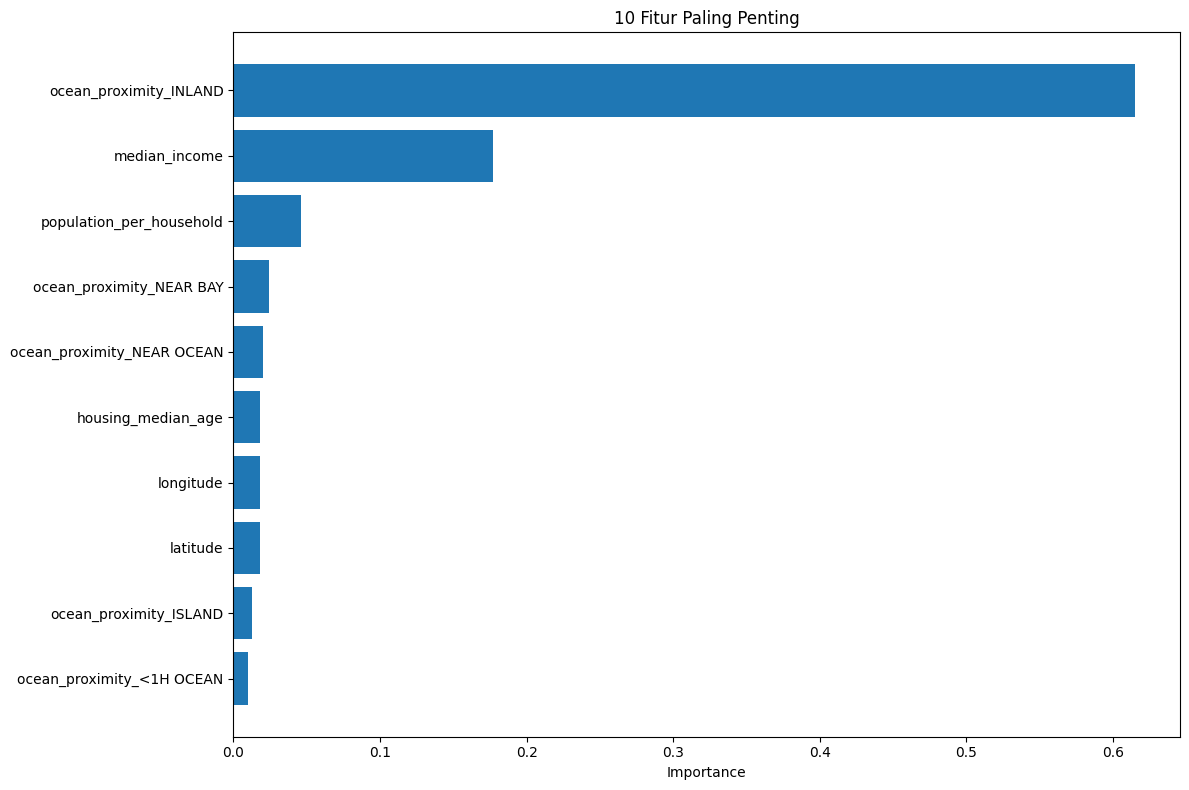

10 Fitur Paling Penting:


,feature,importance
12,ocean_proximity_INLAND,0.614931
7,median_income,0.177321
10,population_per_household,0.045916
14,ocean_proximity_NEAR BAY,0.024059
15,ocean_proximity_NEAR OCEAN,0.019965
2,housing_median_age,0.018121
0,longitude,0.018098
1,latitude,0.017918
13,ocean_proximity_ISLAND,0.012411
11,ocean_proximity_<1H OCEAN,0.009908


In [ ]:
print("=" * 50)
print("ANALISIS FEATURE IMPORTANCE")
print("=" * 50)

# Get feature names after preprocessing
preprocessor = best_model.named_steps['preprocessor']

# Get numeric feature names
numeric_feature_names = numeric_features.copy()

# Get categorical feature names after one-hot encoding
if categorical_features:
    categorical_transformer = preprocessor.named_transformers_['cat']
    onehot_encoder = categorical_transformer.named_steps['onehot']
    categorical_feature_names = onehot_encoder.get_feature_names_out(categorical_features).tolist()
else:
    categorical_feature_names = []

# Combine all feature names
all_feature_names = numeric_feature_names + categorical_feature_names

# Check if the model has feature_importances_ attribute
if hasattr(best_model.named_steps['regressor'], 'feature_importances_'):
    importances = best_model.named_steps['regressor'].feature_importances_

    # Create feature importance dataframe
    feature_importance_df = pd.DataFrame({
        'feature': all_feature_names,
        'importance': importances
    }).sort_values('importance', ascending=False)

    # Plot top features
    plt.figure(figsize=(12, 8))
    top_features = feature_importance_df.head(10)
    plt.barh(range(len(top_features)), top_features['importance'])
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.title('10 Fitur Paling Penting')
    plt.xlabel('Importance')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    print("10 Fitur Paling Penting:")
    display(top_features[['feature', 'importance']])

else:
    print("Model ini tidak memiliki atribut feature_importances_")

# 9. Visualization of Results

Visualisasi hasil membantu dalam memahami performa model secara visual. Kita membandingkan nilai aktual vs prediksi, menganalisis residual, dan melihat distribusi error untuk mengevaluasi kualitas prediksi model

VISUALISASI HASIL


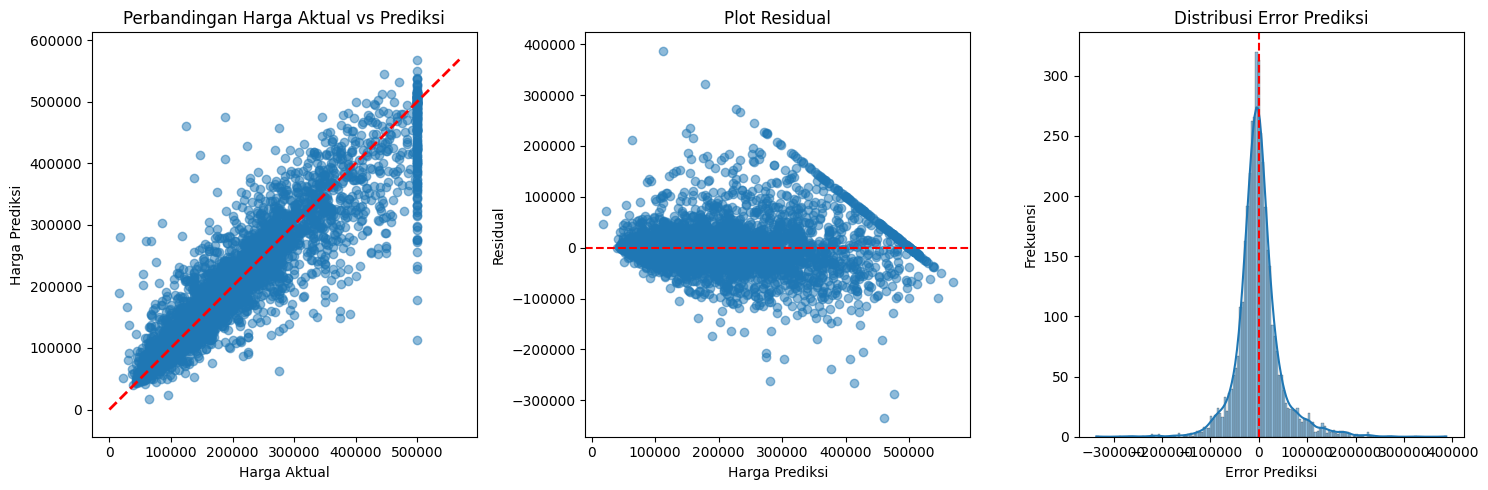

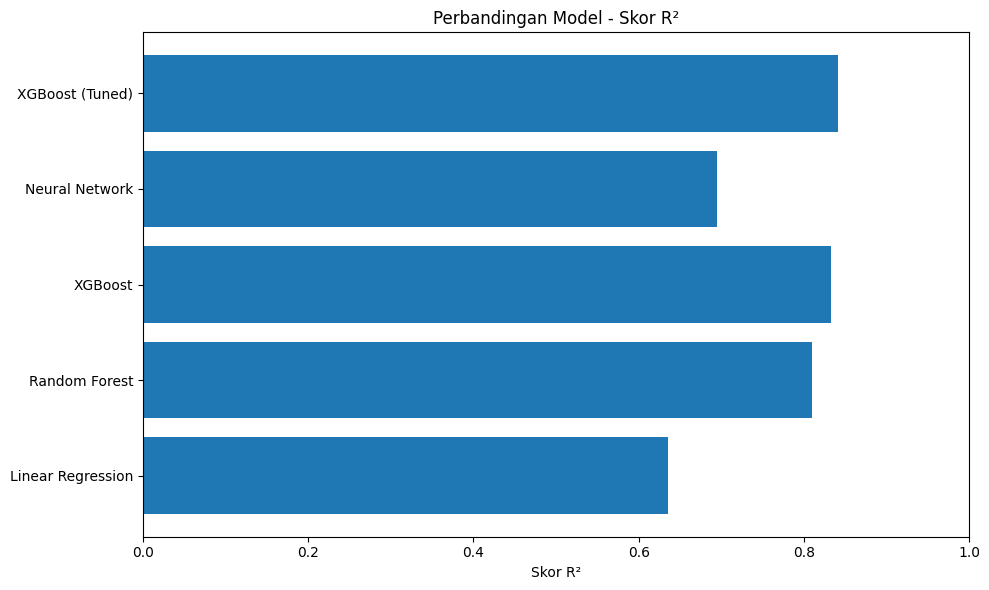

In [ ]:
print("=" * 50)
print("VISUALISASI HASIL")
print("=" * 50)

# Visualization of predictions
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(15, 5))

# 1. Actual vs Predicted
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_best, alpha=0.5)
max_val = max(y_test.max(), y_pred_best.max())
plt.plot([0, max_val], [0, max_val], 'r--', lw=2)
plt.xlabel('Harga Aktual')
plt.ylabel('Harga Prediksi')
plt.title('Perbandingan Harga Aktual vs Prediksi')
plt.axis('equal')

# 2. Residual plot
plt.subplot(1, 3, 2)
residuals = y_test - y_pred_best
plt.scatter(y_pred_best, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Harga Prediksi')
plt.ylabel('Residual')
plt.title('Plot Residual')

# 3. Distribution of errors
plt.subplot(1, 3, 3)
sns.histplot(residuals, kde=True)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Error Prediksi')
plt.ylabel('Frekuensi')
plt.title('Distribusi Error Prediksi')

plt.tight_layout()
plt.show()

# Model comparison plot
plt.figure(figsize=(10, 6))
models_names = list(results.keys())
r2_scores = [results[model]['R2'] for model in models_names]

plt.barh(models_names, r2_scores)
plt.xlabel('Skor R²')
plt.title('Perbandingan Model - Skor R²')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

# 10. Save Results and Model

Pada tahap akhir, kita menyimpan hasil analisis, model terbaik, dan feature importance untuk dokumentasi dan penggunaan di masa depan. Ini memungkinkan reproduksi hasil dan deployment model

In [ ]:
print("=" * 50)
print("MENYIMPAN HASIL")
print("=" * 50)

# Install joblib jika belum terinstall
!pip install joblib

import joblib

# Save results to CSV
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.to_csv('model_results.csv')
print("Hasil disimpan ke model_results.csv")

# Save best model
joblib.dump(best_model, 'best_housing_model.pkl')
print("Model terbaik disimpan ke best_housing_model.pkl")

# Save feature importance
if 'feature_importance_df' in locals():
    feature_importance_df.to_csv('feature_importance.csv', index=False)
    print("Feature importance disimpan ke feature_importance.csv")

print("\nProyek berhasil diselesaikan! 🎉")

MENYIMPAN HASIL
Hasil disimpan ke model_results.csv
Model terbaik disimpan ke best_housing_model.pkl
Feature importance disimpan ke feature_importance.csv

Proyek berhasil diselesaikan! 🎉


# 11. Final Summary

Ringkasan akhir memberikan overview lengkap tentang keseluruhan proyek, termasuk hasil utama, insights, dan rekomendasi. Ini membantu dalam memahami capaian dan implikasi dari analisis yang dilakukan

In [ ]:
print("=" * 50)
print("RINGKASAN PROYEK")
print("=" * 50)

print(f"Model terbaik: {best_model_name}")
print(f"Skor R²: {results[best_model_name]['R2']:.4f}")
print(f"MAE: ${results[best_model_name]['MAE']:.2f}")
print(f"RMSE: ${results[best_model_name]['RMSE']:.2f}")
print(f"Ukuran Dataset: {df.shape[0]} sampel, {df.shape[1]} fitur")
print(f"Missing Values yang ditangani: {missing_values.sum()}")

# Create comprehensive report
summary_report = f"""
PREDIKSI HARGA RUMAH CALIFORNIA - RINGKASAN PROYEK
{'=' * 60}

OVERVIEW PROYEK:
- Dataset: California Housing Prices ({df.shape[0]} sampel, {df.shape[1]} fitur)
- Target Variable: median_house_value
- Algoritma yang Diuji: {list(models.keys())}
- Algoritma Terbaik: {best_model_name}

HASIL:
- Skor R²: {results[best_model_name]['R2']:.4f}
- Mean Absolute Error: ${results[best_model_name]['MAE']:.2f}
- Root Mean Squared Error: ${results[best_model_name]['RMSE']:.2f}

PROSES DATA:
- Missing Values yang Ditangani: {missing_values.sum()}
- Fitur Baru yang Dibuat: 3 (rooms_per_household, bedrooms_per_room, population_per_household)
- Variabel Kategorikal yang Di-encode: 1 (ocean_proximity)

INSIGHTS PENTING:
1. Pendapatan median adalah prediktor paling penting untuk harga rumah
2. Lokasi (kedekatan dengan laut) sangat mempengaruhi harga properti
3. Model tree-based mengungguli model linear
4. Model menjelaskan {results[best_model_name]['R2']:.1%} variansi dalam harga rumah
"""

print(summary_report)

RINGKASAN PROYEK
Model terbaik: XGBoost
Skor R²: 0.8324
MAE: $30469.20
RMSE: $46862.08
Ukuran Dataset: 20640 sampel, 13 fitur
Missing Values yang ditangani: 207

PREDIKSI HARGA RUMAH CALIFORNIA - RINGKASAN PROYEK

OVERVIEW PROYEK:
- Dataset: California Housing Prices (20640 sampel, 13 fitur)
- Target Variable: median_house_value
- Algoritma yang Diuji: ['Linear Regression', 'Random Forest', 'XGBoost', 'Neural Network']
- Algoritma Terbaik: XGBoost

HASIL:
- Skor R²: 0.8324
- Mean Absolute Error: $30469.20
- Root Mean Squared Error: $46862.08

PROSES DATA:
- Missing Values yang Ditangani: 207
- Fitur Baru yang Dibuat: 3 (rooms_per_household, bedrooms_per_room, population_per_household)
- Variabel Kategorikal yang Di-encode: 1 (ocean_proximity)

INSIGHTS PENTING:
1. Pendapatan median adalah prediktor paling penting untuk harga rumah
2. Lokasi (kedekatan dengan laut) sangat mempengaruhi harga properti
3. Model tree-based mengungguli model linear
4. Model menjelaskan 83.2% variansi dalam h